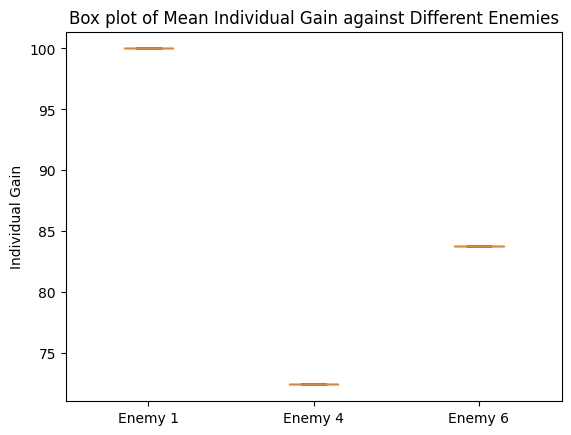

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# List of enemies and their respective filenames
base_path = "../neat-controller/"
enemies = {
    'Enemy 1': f'{base_path}best-1.csv',
    'Enemy 4': f'{base_path}best-4.csv',
    'Enemy 6': f'{base_path}best-6.csv',
}

# Define column names
col_names = ['fitness', 'player_life', 'individual_gain']

data = []

# Loop through the enemies and extract top performing individual gains
for enemy, filename in enemies.items():
    df = pd.read_csv(filename, header=None, names=col_names)
    
    # Filter the best performing individuals
    # Assuming the higher the fitness value, the better
    top_individuals = df.nlargest(5, 'fitness')
    individual_gains = top_individuals['individual_gain'].values
    data.append(individual_gains)

# Boxplot
plt.boxplot(data, vert=True, patch_artist=True, labels=enemies.keys())
plt.title('Box plot of Mean Individual Gain against Different Enemies')
plt.ylabel('Individual Gain')
plt.show()





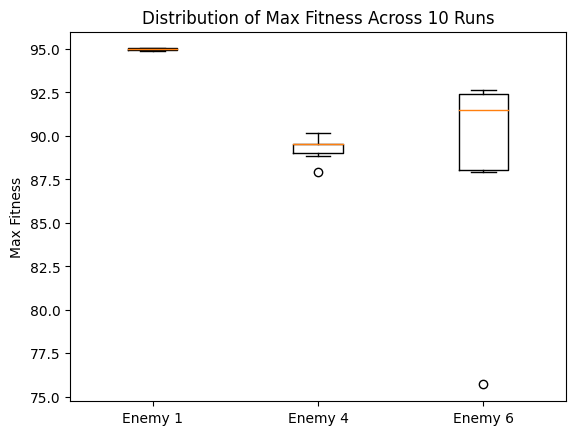

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

enemies = [1, 4, 6]
runs = 10
data = {}

for enemy in enemies:
    max_fitness_list = []
    for run in range(1, runs):
        filename = f'../neat-controller/stats/stats-{enemy}-{run}.csv'
        df = pd.read_csv(filename)
        
        # Get the max fitness of the last generation (or use max() if it's not the last row)
        max_fitness_list.append(df['max_fitness'].iloc[-1])
    
    data[f'Enemy {enemy}'] = max_fitness_list

fig, ax = plt.subplots()
ax.boxplot(data.values())
ax.set_xticks(range(1, len(enemies) + 1))
ax.set_xticklabels(data.keys())
ax.set_title('Distribution of Max Fitness Across 10 Runs')
ax.set_ylabel('Max Fitness')
plt.show()